<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/Insight-Sogang-Univ/insight-14th/blob/main/advanced/template/session05/practice_generativemodel.ipynb" target="_parent">
      <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
    </a>
  </td>
</table>


### 📁 라이브러리 임포트
- AutoEncoder, VAE, GAN은 tensorflow를 사용합니다.
- Diffusion Model은 torch를 사용합니다.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import time
from tqdm.notebook import trange
from tqdm.keras import TqdmCallback

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

### 🧮 GPU 사용하기

In [ ]:
# PyTorch GPU 상태
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"✅ [PyTorch] Using device: {device}")
if torch.cuda.is_available():
    print(f"GPU name: {torch.cuda.get_device_name(0)}")


# TensorFlow GPU 상태
print("\n✅ [TensorFlow] GPU Devices:")
print(tf.config.list_physical_devices('GPU'))

✅ [PyTorch] Using device: cuda
GPU name: Tesla T4

✅ [TensorFlow] GPU Devices:
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# ✍🏻 생성 모델 실습

MNIST 필기체 숫자 이미지 데이터를 사용하여 3가지 생성 모델을 실습해봅시다!

1. **AutoEncoder (오토인코더)** — 입력 이미지를 압축 후 복원  
2. **GAN (Generative Adversarial Network)** — 가짜 이미지를 생성  
3. **Diffusion Model** — 노이즈로부터 이미지를 복원

## 🔍 1. AutoEncoder(오토인코더)
MNIST 필기체 숫자 이미지를 압축(784차원 → 32차원)했다가 복원하는 오토인코더를 작성해 봅시다!

### 1-1.  데이터 준비
- 입력데이터 준비. MNIST필기체 숫자 이미지를 사용하며, 정답레이블은 사용하지 않습니다.
- 모든값은 0~1사이로 정규화하고 28x28이미지를 크기 784x1의 벡터로 만듭니다.

In [ ]:
# MNIST 데이터 로드
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# 정규화 및 reshape
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_train = x_train.*******((len(x_train), np.prod(x_train.shape[1:])))      #reshape()를 호출해 훈련데이터를 배치크기x784로 설정합니다.
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


print("훈련 데이터:", x_train.shape)
print("테스트 데이터:", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
훈련 데이터: (60000, 784)
테스트 데이터: (10000, 784)


### 1-2. AutoEncoder 모델 정의

In [ ]:
#인코더는 렐루 디코더는 시그모이드를 활성화함수로 사용하겠습니다!
encoding_dim = 32
input_img = tf.keras.layers.Input(shape=(784,))
encoded = tf.keras.layers.Dense(encoding_dim, activation='****')(input_img).
decoded= tf.keras.layers.Dense(784, activation='*******')(encoded)
autoencoder = tf.keras.Model(input_img, decoded)


In [ ]:
#모델컴파일. 먼저 화소당 MSE손실을 사용하고, optimizer로 'adam'을 사용합니다.
autoencoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

### 1-3. AutoEncoder 학습
- 이제 오토인코더를 50에폭동안 학습시켜봅시다.

In [ ]:
autoencoder.fit(
    x_train, *_*****,       #x_train, x_test, y_train, y_test 중 어떤것이들어갈까요?
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test),
    verbose=0,  # 기본 progress bar 비활성화
    callbacks=[TqdmCallback(verbose=1)]
)


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

<!-- 결과 -->
<details style="margin-top:10px;">
  <summary style="cursor:pointer;font-weight:700;"><strong>💡 결과 (클릭해서 열기)</strong></summary>
  <div style="border-left:4px solid #7c3aed;padding:10px 12px;margin-top:8px;background:#faf5ff;border-radius:8px; word-break:break-word; overflow-wrap:anywhere;">

      위에서의 학습목표는 입력과 출력이 같아야 하므로 x_train 배열이 입력 데이터와 동시에 정답이 됩니다.
      50에폭 이후 오토인코더는 약 0.01의 안정적인 손실값에 도달한 것을 볼 수 있습니다.

  </div>
</details>


<!-- 위쪽 끊기 -->
<div style="clear: both; display:block; height:0; overflow:hidden;"></div>

### 1-4. 재복원 결과 시각화
- 이제는 맷플롯립을 이용해 x_test에 포함된 원본이미지와 재복원된 이미지를 화면에 그려봅시다.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


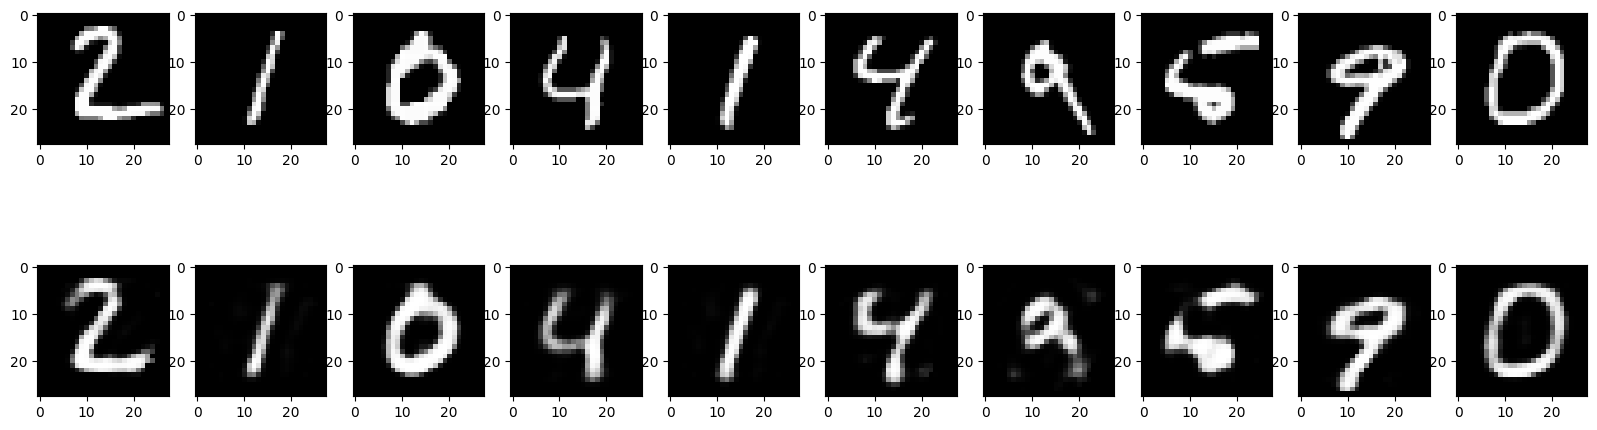

In [ ]:
decoded_imgs = autoencoder.predict(*_****)  # 어떤데이터를 예측해야할까요?

n=10
plt.figure(figsize=(20, 6))
for i in range(1, n+1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')    #원본이미지

    ax = plt.subplot(2, n, i +n )
    plt.imshow(decoded_imgs[i].reshape(28,28), cmap='gray')   # 재구성된 이미지
plt.show()

**💡 윗줄은 원래 숫자이미지고, 아랫줄은 재구성된 숫자 이미지입니다!**

**재복원된 이미지가 약간 이상한 것도 있지만 784픽셀이 32픽셀로 줄어들었다가 다시 복원된 것을 감안하면 양호한 수준입니다.**

## 🔍 2. VAE

- VAE로도 MNIST 데이터의 이미지를 복원해볼까요?

### 2-1. 데이터 준비

In [ ]:
# MNIST 데이터 로드
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# 정규화 및 reshape
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

print("훈련 데이터:", x_train.shape)
print("테스트 데이터:", x_test.shape)

훈련 데이터: (60000, 28, 28, 1)
테스트 데이터: (10000, 28, 28, 1)


### 2-2. VAE 모델 정의

In [ ]:
latent_dim = 2  # 잠재 공간 차원

In [ ]:
# ----- 인코더 -----
encoder_inputs = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

VAE의 목적은 입력 $X$를 확률 분포 $P(z|X)$를 따르는 잠재 벡터 $z$로 인코딩하는 것입니다.

이 과정에서 $z$를 샘플링하게 되는데, 일반적인 무작위 샘플링은 역전파(Backpropagation)를 통해 모델의 가중치를 업데이트할 수 없다는 문제가 있습니다.

재매개변수화 트릭은 이 문제를 해결하여 $z$를 생성하는 과정에 '무작위성(Randomness)'을 유지하면서도 '미분 가능성(Differentiability)'을 확보합니다.

In [ ]:
# 재매개변수화 트릭


def sampling(args):
    z_****, z_log_*** = args.      #z의 평균과 로그분산을 샘플링합니다!
    eps = tf.******.normal(shape=(tf.shape(z_mean)[0], latent_dim))   # 무작위성을 줍시다! 무작위는영어로?
    return z_mean + tf.exp(0.5 * z_log_var) * eps   # return값이 잠재벡터 z의 공식이 됩니다.

z = layers.Lambda(sampling, name="z")([z_mean, z_log_var])
encoder = Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 14, 14,    │        320 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 7, 7, 64)  │     18,496 │ conv2d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 3136)      │          0 │ conv2d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │    401,536 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 2)         │        258 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 2)         │        258 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z (Lambda)          │ (None, 2)         │          0 │ z_mean[0][0],     │
│                     │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 420,868 (1.61 MB)

 Trainable params: 420,868 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ----- 디코더 -----
latent_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2D(1, 3, activation="sigmoid", padding="same")(x)

decoder = Model(latent_******, decoder_*******, name="decoder")
decoder.summary()


Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3136)           │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 14, 14, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 28, 28, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,089 (254.25 KB)

 Trainable params: 65,089 (254.25 KB)

 Non-trainable params: 0 (0.00 B)

### 2-3. VAE 클래스 정의

In [ ]:
class VAE(Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def compile(self, optimizer, **kwargs):
        super(VAE, self).compile(**kwargs)
        self.optimizer = optimizer

        self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")
        self.recon_loss_tracker = tf.keras.metrics.Mean(name="recon_loss")
        self.kl_loss_tracker = tf.keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.recon_loss_tracker,
            self.kl_loss_tracker,
        ]

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        return self.decoder(z)

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            # 재구성 손실 (픽셀별 MSE)
            recon_loss = tf.reduce_mean(
                tf.reduce_sum(tf.square(data - reconstruction), axis=[1,2,3])
            )
            # KL 손실
            kl_loss = -0.5 * tf.reduce_mean(
                tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1)
            )
            total_loss = recon_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        self.total_loss_tracker.update_state(total_loss)
        self.recon_loss_tracker.update_state(recon_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "recon_loss": self.recon_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

### 2-4. VAE 학습

In [ ]:
# 모델 생성
vae = VAE(encoder, decoder)
vae.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=lambda x, y: 0.0  # validation용 dummy loss
)

In [ ]:
# 학습
history = vae.***(              #학습
    x_train,
    epochs=30,
    batch_size=128,
    validation_data=(x_test, *_****) # x_train, x_test, y_train, y_test중 어떤게 들어갈까요?
)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - kl_loss: 2.5884 - loss: 47.9552 - recon_loss: 45.3668 - val_kl_loss: 0.0000e+00 - val_recon_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl_loss: 2.8386 - loss: 46.1971 - recon_loss: 43.3585 - val_kl_loss: 0.0000e+00 - val_recon_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl_loss: 3.0519 - loss: 44.8930 - recon_loss: 41.8411 - val_kl_loss: 0.0000e+00 - val_recon_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl_loss: 3.2209 - loss: 43.6659 - recon_loss: 40.4450 - val_kl_loss: 0.0000e+00 - val_recon_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - kl_loss: 3.3855 - loss: 42.7225 - recon_loss: 39.3370 - val_kl_loss: 0.0000e+00 - val_recon_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━

### 2-5. 재복원 결과 시각화

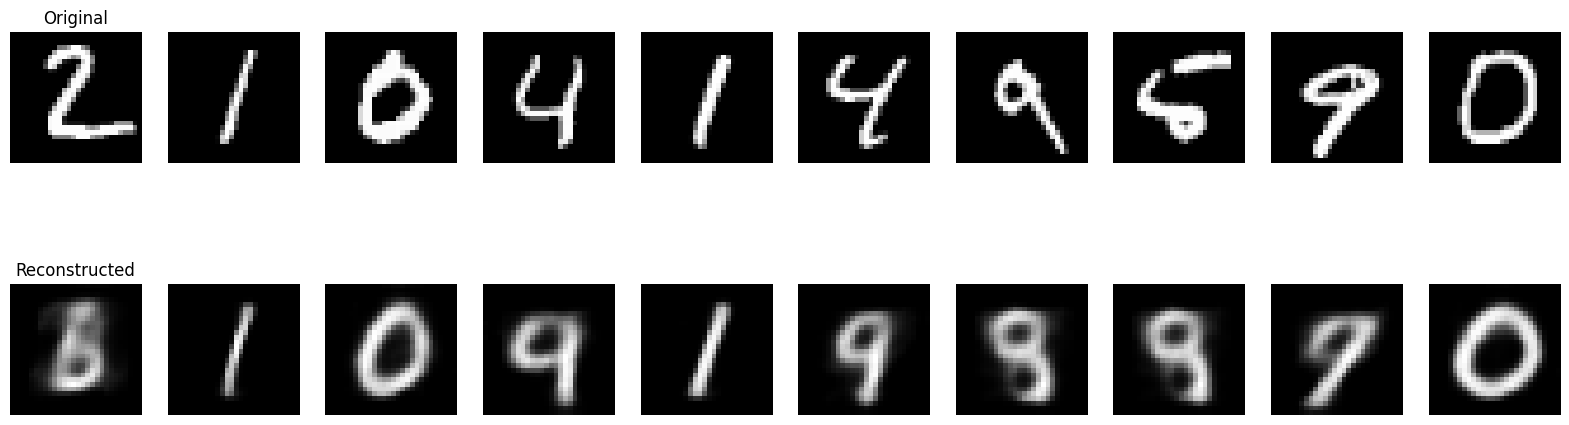

In [ ]:
# 테스트 데이터 복원
decoded_imgs = vae.decoder(vae.encoder(x_test)[2])

n = 10
plt.figure(figsize=(20, 6))
for i in range(1, n + 1):
    # 원본 이미지
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
    if i == 1:
        plt.title("Original")

    # 복원 이미지
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].numpy().reshape(28, 28), cmap="gray")
    plt.axis("off")
    if i == 1:
        plt.title("Reconstructed")
plt.show()


## 🔍 3. GAN

이번엔 생성자(Generator)와 판별자(Discriminator)를 번갈아 학습시켜 MNIST 필기체 숫자 이미지를 새로 생성해봅시다.

### 3-1. 데이터 준비

In [ ]:
# MNIST 데이터 로드
(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()

# [0, 1] → [-1, 1] 스케일링 (GAN에서는 tanh 출력 맞추기 위함)
x_train = (x_train.astype(np.float32) - 127.5) / 127.5
x_train = np.expand_dims(x_train, axis=-1)

BUFFER_SIZE = 60000
BATCH_SIZE = 256

# tf.data로 배치 구성
train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)


### 3-2. 생성자(Generator) 모델 정의

In [ ]:
def make_generator_model():
    model = tf.keras.Sequential([
        layers.Dense(7*7*256, use_bias=False, input_shape=(100,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Reshape((7, 7, 256)),

        layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh')
    ])
    return model

generator = make_*********_*****()  #위에서 정의한 생성자 함수!
generator.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 12544)          │     1,254,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 12544)          │        50,176 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 7, 7, 128)      │       819,200 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 14, 14, 64)     │       204,800 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 28, 28, 1)      │         1,600 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,330,944 (8.89 MB)

 Trainable params: 2,305,472 (8.79 MB)

 Non-trainable params: 25,472 (99.50 KB)

### 3-3. 판별자(Discriminator) 모델 정의

In [ ]:
def make_discriminator_model():
    model = tf.keras.Sequential([
        layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                      input_shape=[28, 28, 1]),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(1)
    ])
    return model

discriminator = make_*************_*****()  #위에서 정의한 판별자 함수!
discriminator.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │         6,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 212,865 (831.50 KB)

 Trainable params: 212,865 (831.50 KB)

 Non-trainable params: 0 (0.00 B)

### 3-4. 손실함수 및 옵티마이저 설정

In [ ]:
# 판별자는 이진분류모델이기 때문에 이진 교차 엔트로피 손실함수를 사용합니다.
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return ****_loss + ****_loss        # 총 손실은 두 손실의 합입니다!

def generator_loss(fake_output):
    return *****_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

### 3-5. 학습 루프 정의

In [ ]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# 고정 시드(매번 같은 예시 생성)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0] * 0.5 + 0.5, cmap='gray')
        plt.axis('off')
    plt.suptitle(f'Epoch {epoch}', fontsize=14)
    plt.show()


### 3-6. GAN 학습

In [ ]:
def train_gan(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

        for image_batch in dataset:
            gen_loss, disc_loss = train_step(image_batch)

        generate_and_save_images(generator, epoch + 1, seed)
        print(f'\nEpoch {epoch+1}, Gen Loss: {gen_loss:.4f}, Disc Loss: {disc_loss:.4f}')
        print(f'Time for epoch {epoch+1} is {time.time()-start:.2f} sec\n')

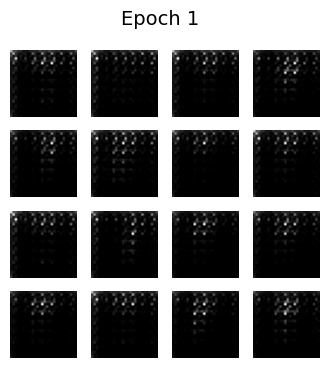


Epoch 1, Gen Loss: 0.6733, Disc Loss: 1.4294
Time for epoch 1 is 20.18 sec



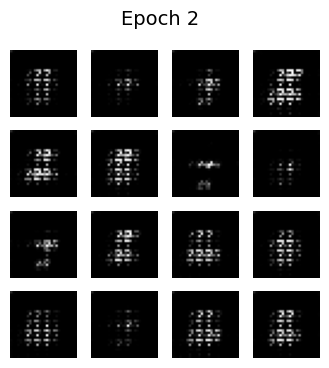


Epoch 2, Gen Loss: 0.7341, Disc Loss: 1.4074
Time for epoch 2 is 11.77 sec



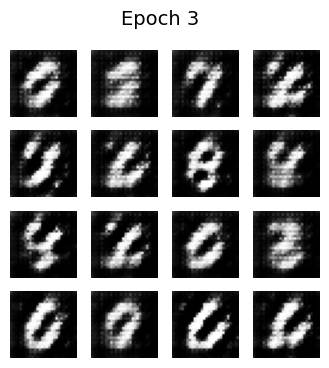


Epoch 3, Gen Loss: 0.7622, Disc Loss: 1.3062
Time for epoch 3 is 11.87 sec



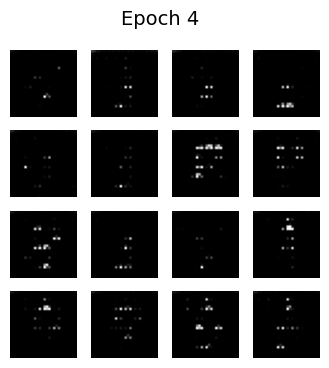


Epoch 4, Gen Loss: 1.0177, Disc Loss: 1.0287
Time for epoch 4 is 11.98 sec



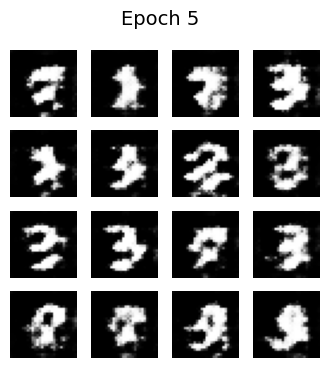


Epoch 5, Gen Loss: 0.8044, Disc Loss: 1.4135
Time for epoch 5 is 12.09 sec



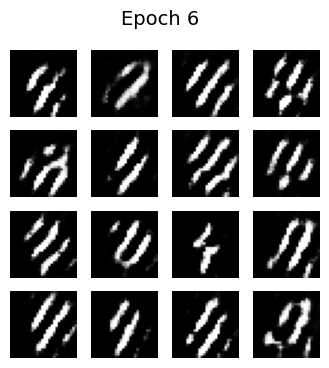


Epoch 6, Gen Loss: 0.7973, Disc Loss: 1.3997
Time for epoch 6 is 12.18 sec



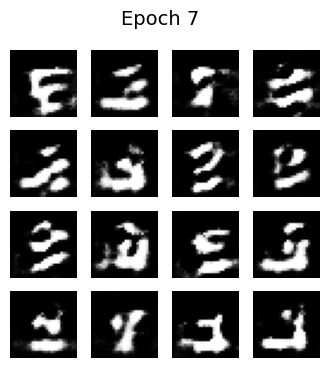


Epoch 7, Gen Loss: 0.8370, Disc Loss: 1.4008
Time for epoch 7 is 12.25 sec



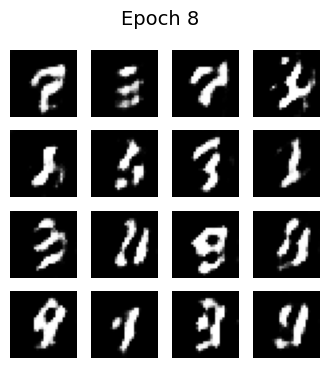


Epoch 8, Gen Loss: 0.9502, Disc Loss: 1.1117
Time for epoch 8 is 12.94 sec



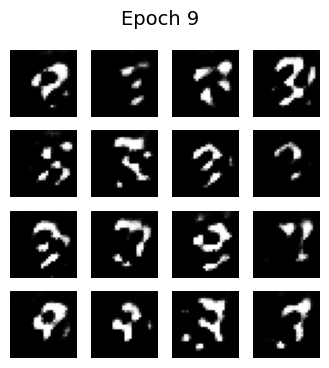


Epoch 9, Gen Loss: 0.9163, Disc Loss: 1.1359
Time for epoch 9 is 12.44 sec



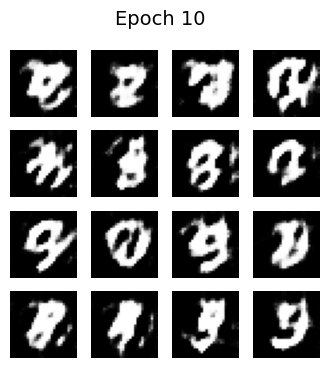


Epoch 10, Gen Loss: 0.7130, Disc Loss: 1.4080
Time for epoch 10 is 12.47 sec



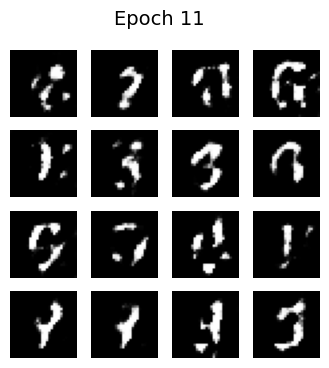


Epoch 11, Gen Loss: 0.9085, Disc Loss: 1.2471
Time for epoch 11 is 12.38 sec



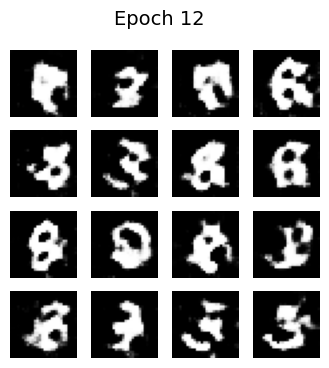


Epoch 12, Gen Loss: 0.8172, Disc Loss: 1.3580
Time for epoch 12 is 12.46 sec



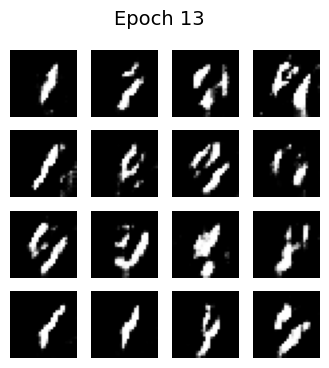


Epoch 13, Gen Loss: 0.8852, Disc Loss: 1.2371
Time for epoch 13 is 12.59 sec



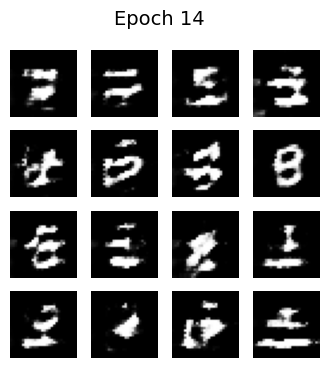


Epoch 14, Gen Loss: 0.9982, Disc Loss: 1.0353
Time for epoch 14 is 12.70 sec



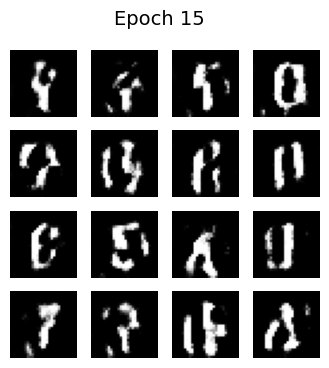


Epoch 15, Gen Loss: 1.0755, Disc Loss: 1.0866
Time for epoch 15 is 12.74 sec



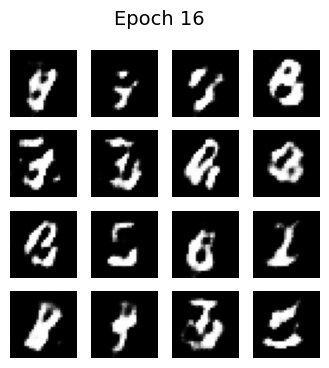


Epoch 16, Gen Loss: 1.0227, Disc Loss: 1.0779
Time for epoch 16 is 12.69 sec



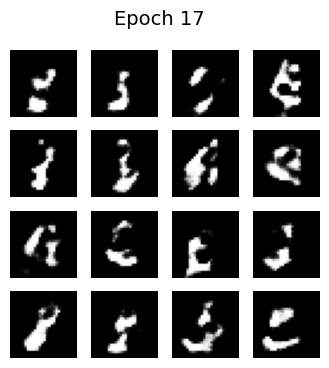


Epoch 17, Gen Loss: 0.9573, Disc Loss: 1.2720
Time for epoch 17 is 13.16 sec



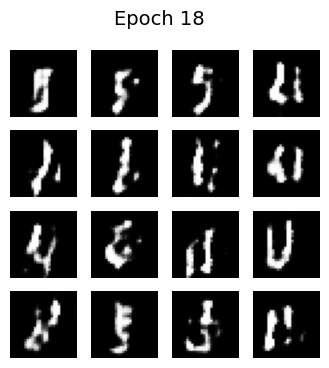


Epoch 18, Gen Loss: 1.2806, Disc Loss: 0.9044
Time for epoch 18 is 12.63 sec



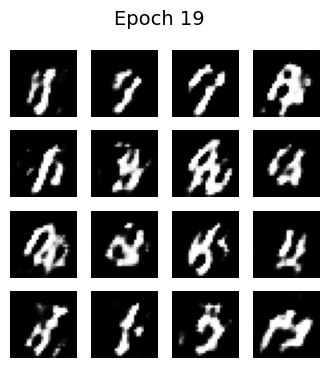


Epoch 19, Gen Loss: 1.3348, Disc Loss: 0.9336
Time for epoch 19 is 12.69 sec



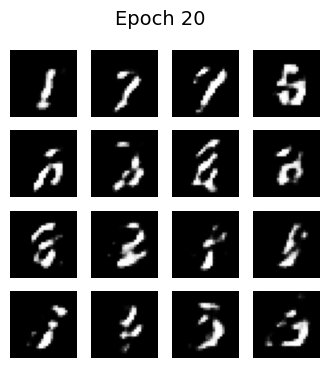


Epoch 20, Gen Loss: 1.0663, Disc Loss: 1.2550
Time for epoch 20 is 12.72 sec



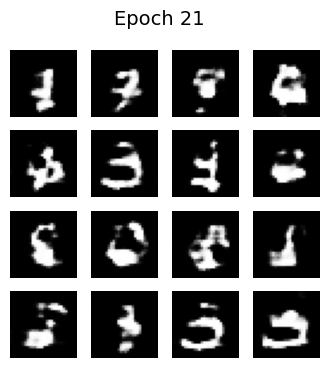


Epoch 21, Gen Loss: 1.2592, Disc Loss: 1.1054
Time for epoch 21 is 12.74 sec



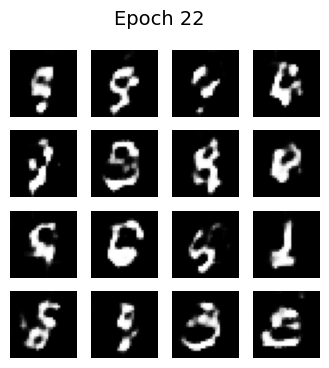


Epoch 22, Gen Loss: 1.1509, Disc Loss: 1.0729
Time for epoch 22 is 12.73 sec



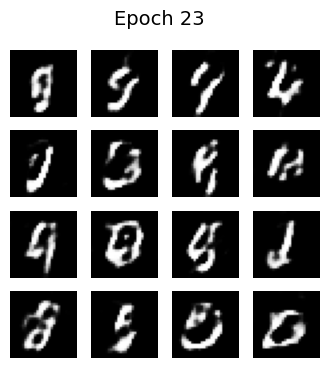


Epoch 23, Gen Loss: 1.0514, Disc Loss: 1.0344
Time for epoch 23 is 12.73 sec



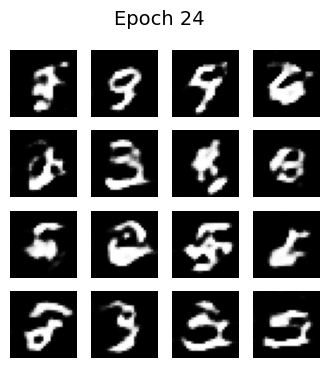


Epoch 24, Gen Loss: 1.3041, Disc Loss: 0.9140
Time for epoch 24 is 12.78 sec



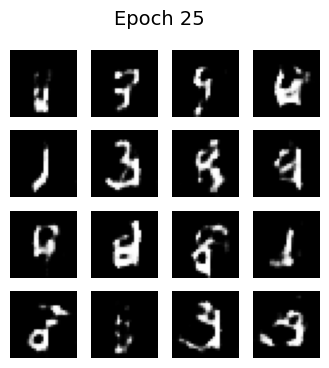


Epoch 25, Gen Loss: 1.5910, Disc Loss: 0.8714
Time for epoch 25 is 12.81 sec



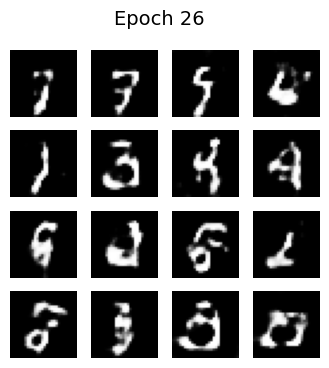


Epoch 26, Gen Loss: 1.1461, Disc Loss: 0.9475
Time for epoch 26 is 12.72 sec



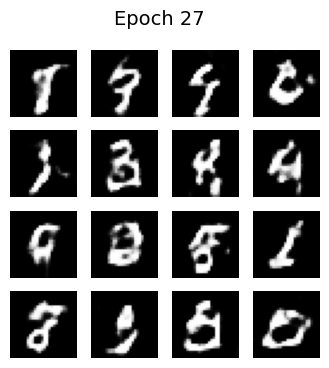


Epoch 27, Gen Loss: 1.2030, Disc Loss: 1.1461
Time for epoch 27 is 13.24 sec



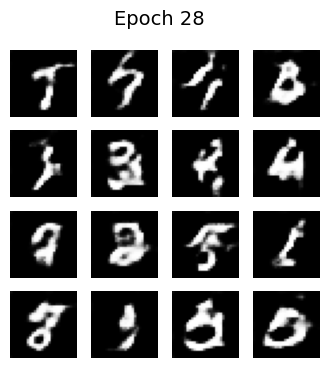


Epoch 28, Gen Loss: 1.2825, Disc Loss: 1.0866
Time for epoch 28 is 12.68 sec



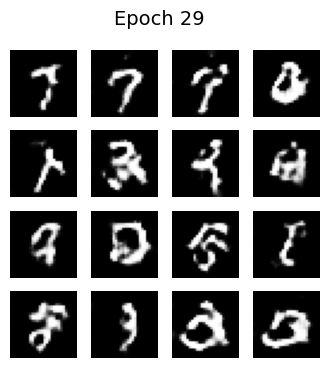


Epoch 29, Gen Loss: 1.1756, Disc Loss: 1.4090
Time for epoch 29 is 12.68 sec



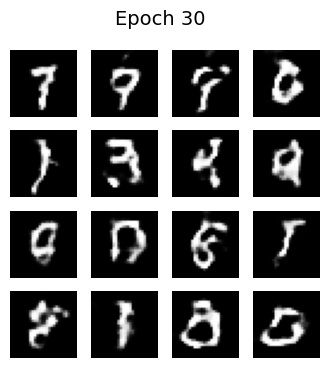


Epoch 30, Gen Loss: 1.1630, Disc Loss: 1.1180
Time for epoch 30 is 12.69 sec



In [ ]:
# 코랩 T4 기준 약 6분 정도 걸리는 코드입니다.

train_gan(train_dataset, epochs=30)

#### ⚠️ 주의! 아래 GAN 학습 코드는 코랩 T4 기준 약 10분 정도 걸립니다. 오늘은 결과만 확인하고 나중에 여유될 때 직접해봅시다!

Epoch 1, Gen Loss: 0.8236, Disc Loss: 1.0760


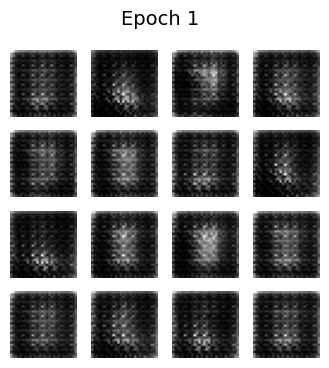

Time for epoch 1 is 19.42 sec
Epoch 2, Gen Loss: 0.7491, Disc Loss: 1.4173


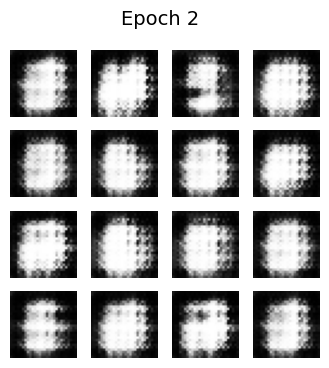

Time for epoch 2 is 11.61 sec
Epoch 3, Gen Loss: 0.8015, Disc Loss: 1.3723


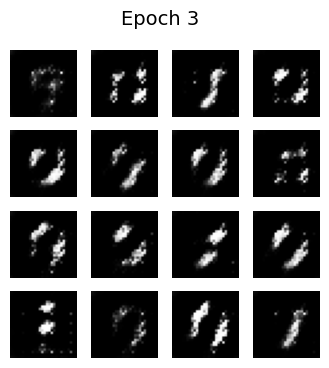

Time for epoch 3 is 11.75 sec
Epoch 4, Gen Loss: 0.9089, Disc Loss: 1.1268


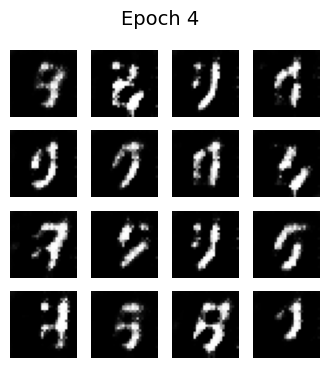

Time for epoch 4 is 11.94 sec
Epoch 5, Gen Loss: 0.9447, Disc Loss: 1.2113


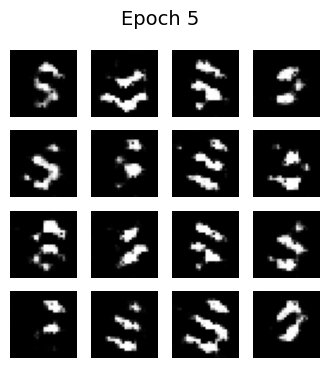

Time for epoch 5 is 12.11 sec
Epoch 6, Gen Loss: 1.0184, Disc Loss: 1.1381


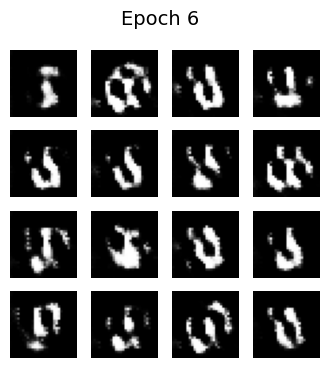

Time for epoch 6 is 12.34 sec
Epoch 7, Gen Loss: 0.7101, Disc Loss: 1.5468


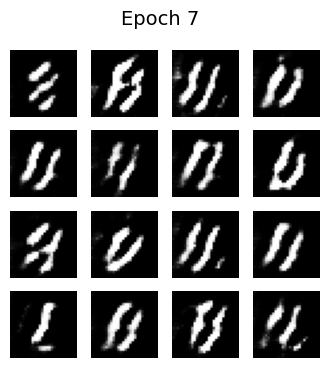

Time for epoch 7 is 12.37 sec
Epoch 8, Gen Loss: 0.9960, Disc Loss: 1.2413


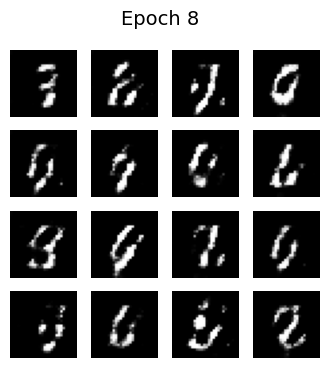

Time for epoch 8 is 12.62 sec
Epoch 9, Gen Loss: 1.1377, Disc Loss: 0.9522


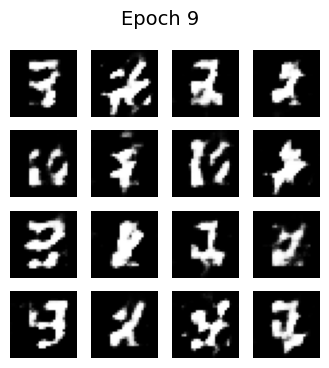

Time for epoch 9 is 12.06 sec
Epoch 10, Gen Loss: 0.8822, Disc Loss: 1.2416


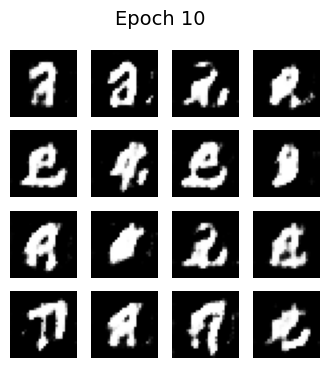

Time for epoch 10 is 12.06 sec
Epoch 11, Gen Loss: 1.0862, Disc Loss: 1.0557


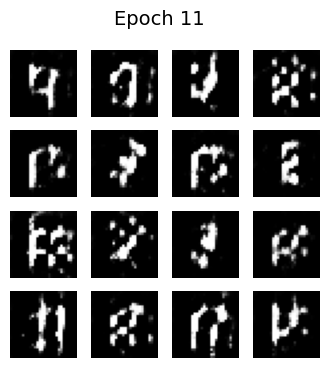

Time for epoch 11 is 12.14 sec
Epoch 12, Gen Loss: 1.0318, Disc Loss: 1.0410


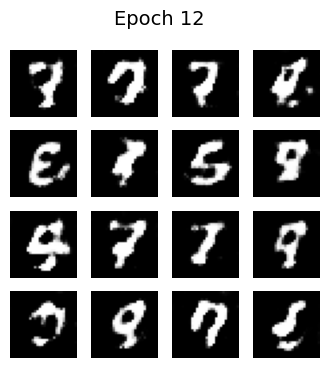

Time for epoch 12 is 12.19 sec
Epoch 13, Gen Loss: 1.0316, Disc Loss: 1.0385


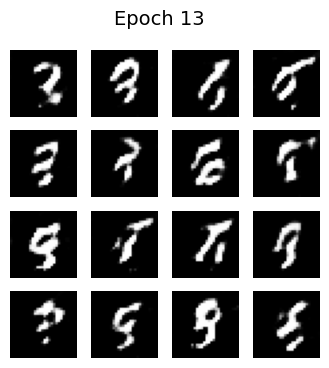

Time for epoch 13 is 12.18 sec
Epoch 14, Gen Loss: 0.8657, Disc Loss: 1.4286


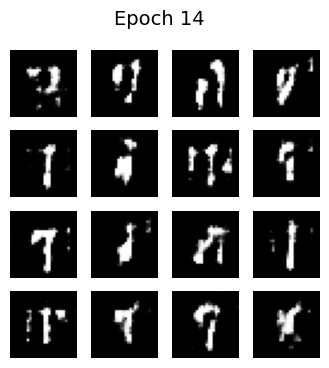

Time for epoch 14 is 12.18 sec
Epoch 15, Gen Loss: 1.0990, Disc Loss: 1.1992


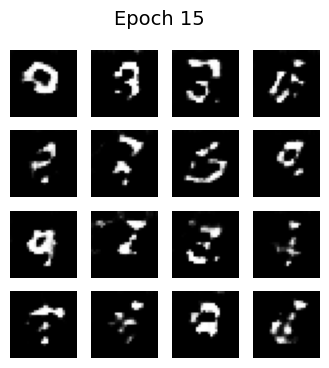

Time for epoch 15 is 12.16 sec
Epoch 16, Gen Loss: 1.4339, Disc Loss: 0.9138


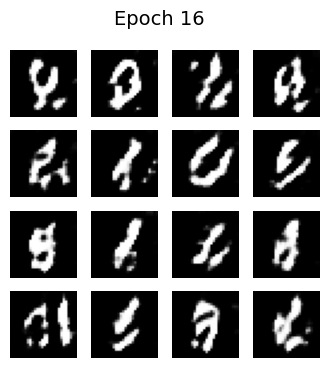

Time for epoch 16 is 12.39 sec
Epoch 17, Gen Loss: 0.9785, Disc Loss: 1.2802


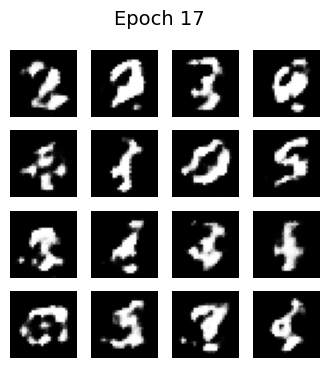

Time for epoch 17 is 12.18 sec
Epoch 18, Gen Loss: 1.1300, Disc Loss: 1.2605


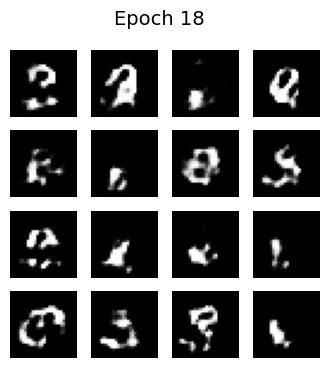

Time for epoch 18 is 12.64 sec
Epoch 19, Gen Loss: 0.9980, Disc Loss: 1.2443


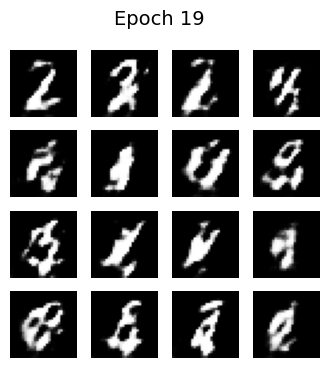

Time for epoch 19 is 12.15 sec
Epoch 20, Gen Loss: 1.2465, Disc Loss: 0.8785


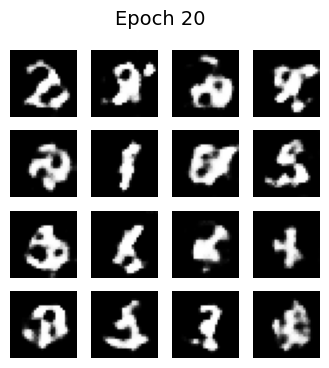

Time for epoch 20 is 12.20 sec
Epoch 21, Gen Loss: 1.1589, Disc Loss: 1.1035


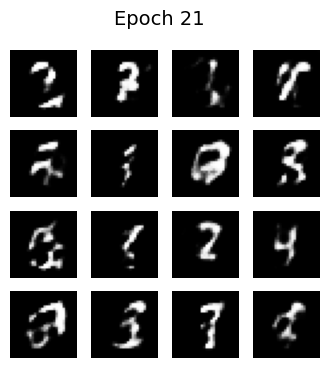

Time for epoch 21 is 12.20 sec
Epoch 22, Gen Loss: 1.1026, Disc Loss: 1.1855


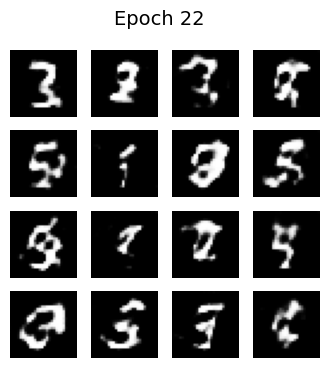

Time for epoch 22 is 12.18 sec
Epoch 23, Gen Loss: 1.2841, Disc Loss: 1.0137


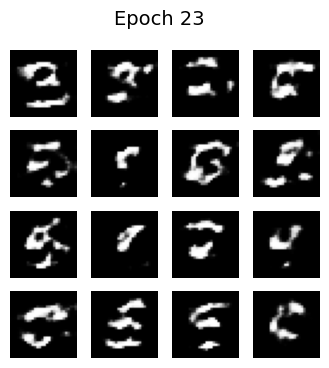

Time for epoch 23 is 12.15 sec
Epoch 24, Gen Loss: 1.5061, Disc Loss: 0.9351


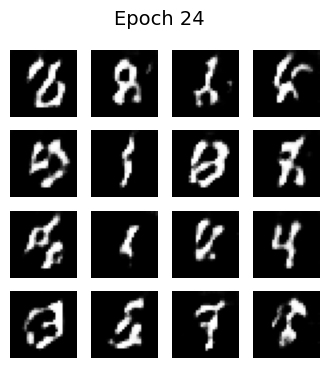

Time for epoch 24 is 12.15 sec
Epoch 25, Gen Loss: 1.2468, Disc Loss: 0.8988


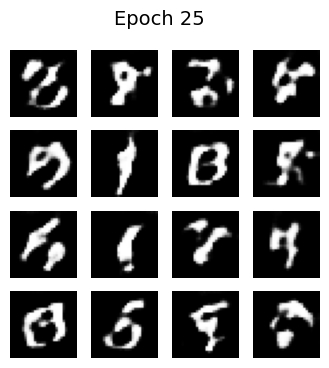

Time for epoch 25 is 12.13 sec
Epoch 26, Gen Loss: 1.2257, Disc Loss: 0.9645


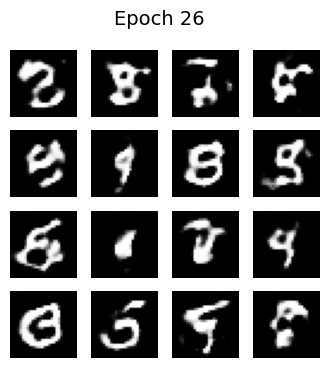

Time for epoch 26 is 12.15 sec
Epoch 27, Gen Loss: 1.1734, Disc Loss: 1.1307


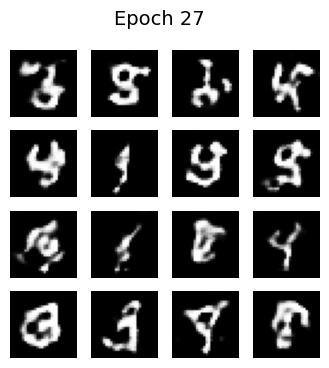

Time for epoch 27 is 12.15 sec
Epoch 28, Gen Loss: 1.4094, Disc Loss: 0.8976


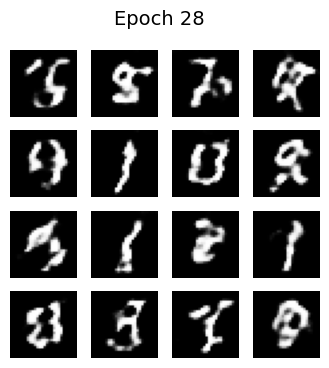

Time for epoch 28 is 12.64 sec
Epoch 29, Gen Loss: 1.4458, Disc Loss: 0.9972


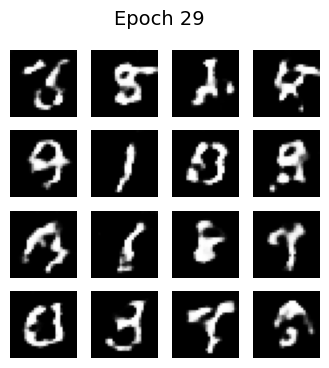

Time for epoch 29 is 12.27 sec
Epoch 30, Gen Loss: 1.0871, Disc Loss: 1.1066


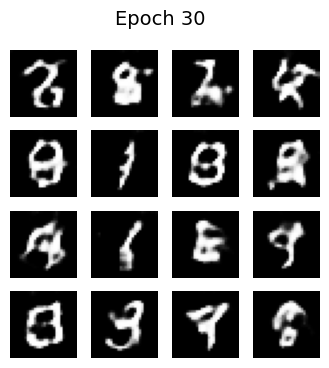

Time for epoch 30 is 20.67 sec
Epoch 31, Gen Loss: 1.1918, Disc Loss: 1.2382


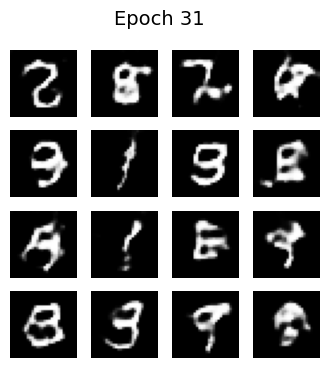

Time for epoch 31 is 12.10 sec
Epoch 32, Gen Loss: 1.0580, Disc Loss: 1.0557


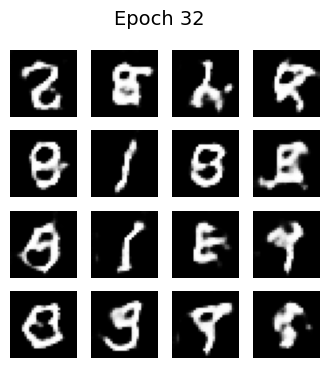

Time for epoch 32 is 12.56 sec
Epoch 33, Gen Loss: 1.0087, Disc Loss: 1.2600


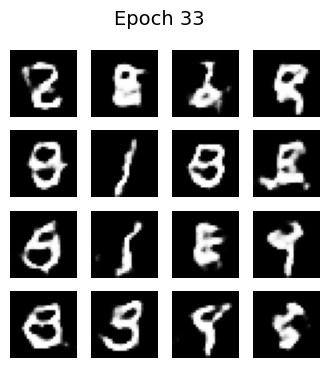

Time for epoch 33 is 12.73 sec
Epoch 34, Gen Loss: 1.0983, Disc Loss: 1.1302


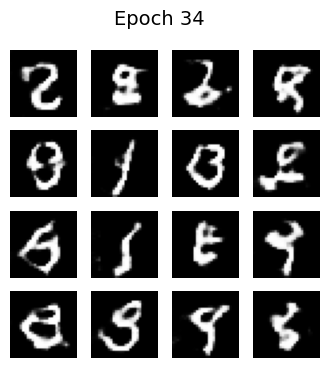

Time for epoch 34 is 12.31 sec
Epoch 35, Gen Loss: 1.0821, Disc Loss: 1.0813


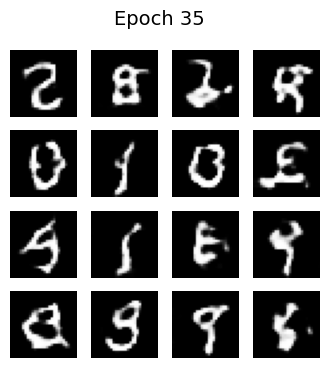

Time for epoch 35 is 12.17 sec
Epoch 36, Gen Loss: 1.0340, Disc Loss: 1.1218


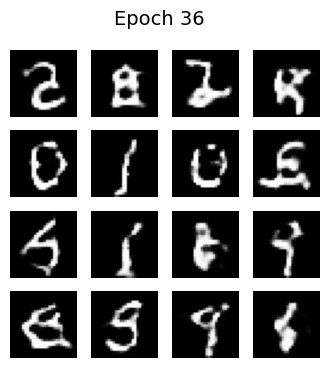

Time for epoch 36 is 12.00 sec
Epoch 37, Gen Loss: 1.0460, Disc Loss: 1.3319


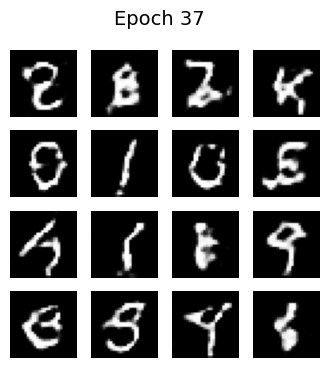

Time for epoch 37 is 12.04 sec
Epoch 38, Gen Loss: 1.0101, Disc Loss: 1.2760


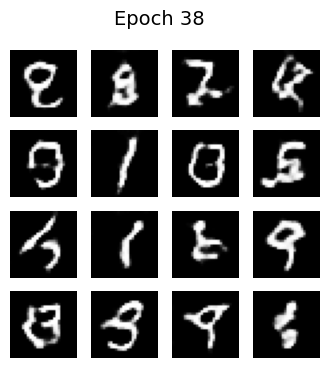

Time for epoch 38 is 12.77 sec
Epoch 39, Gen Loss: 0.8923, Disc Loss: 1.2225


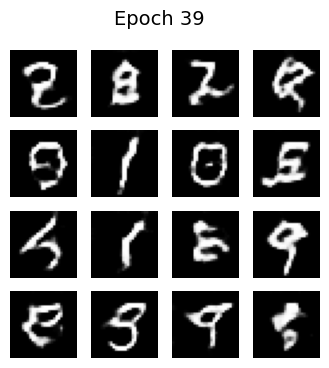

Time for epoch 39 is 12.38 sec
Epoch 40, Gen Loss: 1.0474, Disc Loss: 1.1424


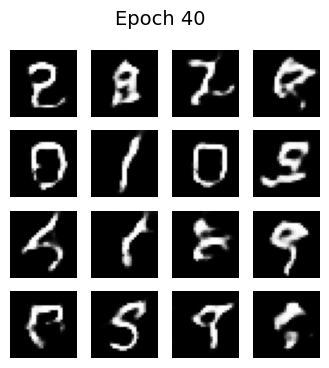

Time for epoch 40 is 12.50 sec
Epoch 41, Gen Loss: 1.0095, Disc Loss: 1.1781


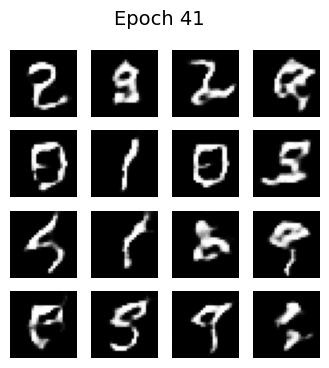

Time for epoch 41 is 12.46 sec
Epoch 42, Gen Loss: 1.0780, Disc Loss: 1.0953


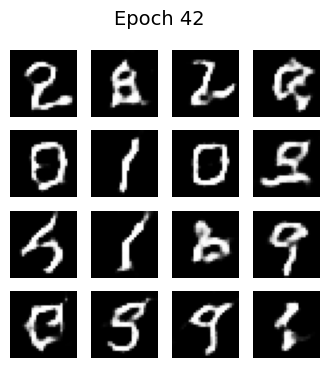

Time for epoch 42 is 12.29 sec
Epoch 43, Gen Loss: 1.0300, Disc Loss: 1.2373


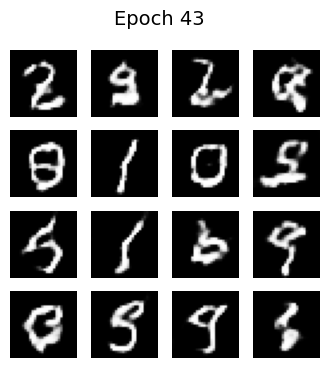

Time for epoch 43 is 12.32 sec
Epoch 44, Gen Loss: 0.9369, Disc Loss: 1.2284


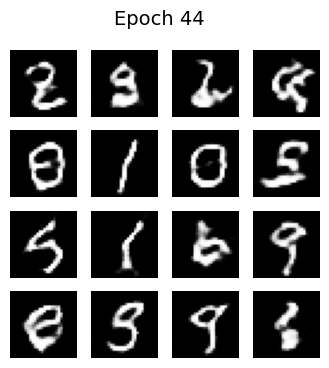

Time for epoch 44 is 12.17 sec
Epoch 45, Gen Loss: 1.0506, Disc Loss: 1.1572


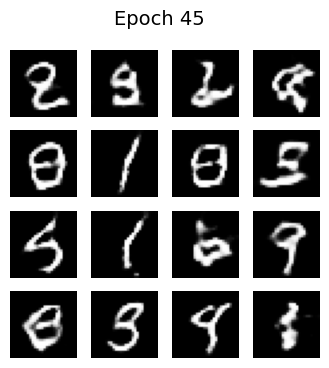

Time for epoch 45 is 12.13 sec
Epoch 46, Gen Loss: 0.9650, Disc Loss: 1.2394


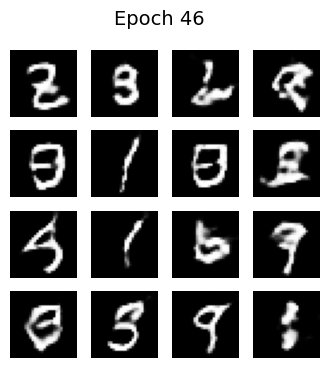

Time for epoch 46 is 12.18 sec
Epoch 47, Gen Loss: 1.0287, Disc Loss: 1.1522


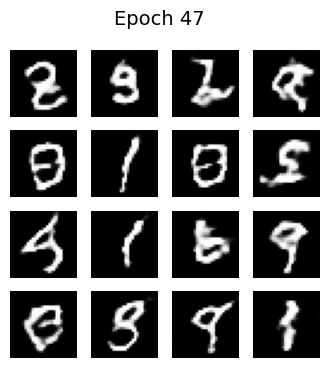

Time for epoch 47 is 12.21 sec
Epoch 48, Gen Loss: 1.0151, Disc Loss: 1.3063


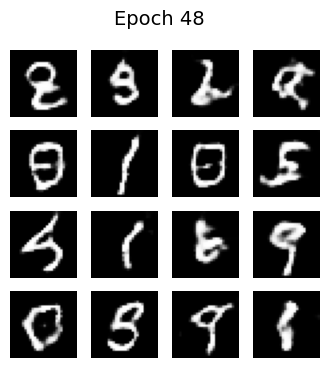

Time for epoch 48 is 12.69 sec
Epoch 49, Gen Loss: 0.8453, Disc Loss: 1.2549


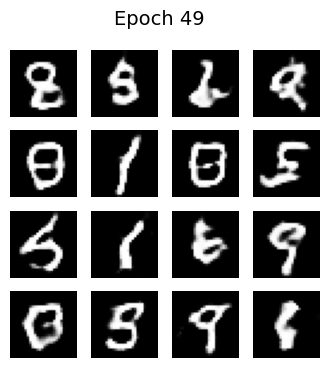

Time for epoch 49 is 12.15 sec
Epoch 50, Gen Loss: 1.0724, Disc Loss: 1.1411


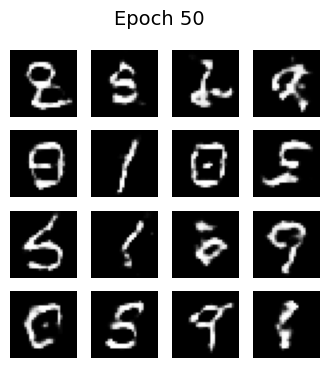

Time for epoch 50 is 12.17 sec


In [ ]:
#train_gan(train_dataset, EPOCHS)

**💡 Generator Loss와 Discriminator Loss는 서로 비슷한 수준인 것이 가장 좋습니다!**

### 3-7. 최종 이미지 생성

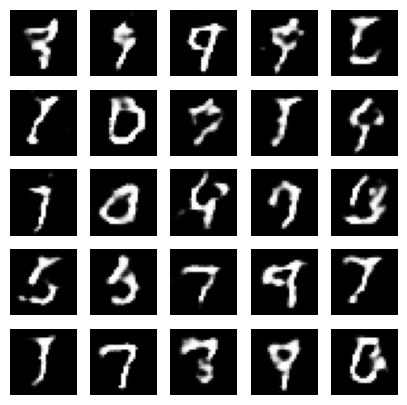

In [ ]:
# 학습이 끝난 후 새로운 이미지를 생성
noise = tf.random.normal([25, noise_dim])
generated_images = *********(noise, training=False)   #생성자!

plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(generated_images[i, :, :, 0] * 0.5 + 0.5, cmap='gray')
    plt.axis('off')
plt.show()

**💡 첫 에폭에선 형편없는 가짜 이미지가 생성됩니다.**

**그러나 50 에폭이 지나면 이미지가 숫자들의 애매한 스케치형태로 진화한 것을 볼 수 있습니다.**

**더 많은 에폭을 지나면 그럴싸한 위조숫자를 만들어내겠죠?**


## 🔍 4. Diffusion Model (확산 모형)

### 4-1. 데이터 준비

100%|██████████| 9.91M/9.91M [00:00<00:00, 19.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 486kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.50MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.5MB/s]


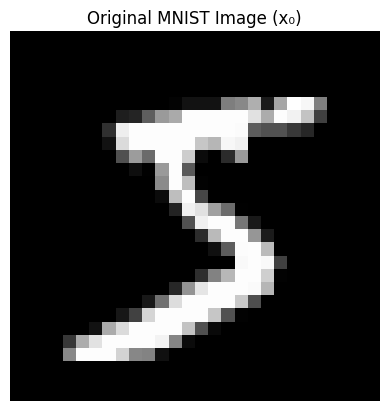

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])
data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(data, batch_size=64, shuffle=True)

# 샘플 하나 시각화
x0_sample = data[0][0]
plt.imshow(x0_sample.squeeze(), cmap='gray')
plt.axis('off')
plt.title("Original MNIST Image (x₀)")
plt.show()

### 4-2. 순확산 (Forward Diffusion)

In [ ]:
T = 300  # total diffusion steps
beta = torch.linspace(1e-4, 0.02, T).to(device)
alpha = 1 - beta
alpha_bar = torch.cumprod(alpha, dim=0)

In [ ]:
# ✅ 배치 단위로 노이즈 추가
def add_noise(x0, t):
    noise = torch.randn_like(x0)
    sqrt_ab = torch.sqrt(alpha_bar[t]).view(-1, 1, 1, 1)    # 원본데이터(x0)에 곱해지는 가중치
    sqrt_1_ab = torch.sqrt(1 - alpha_bar[t]).view(-1, 1, 1, 1)    # 노이즈(noise)에 곱해지는 가중치
    return sqrt_ab * ** + sqrt_1_ab * *****   # 가중치에 원본데이터와 노이즈를 곱해줍시다!


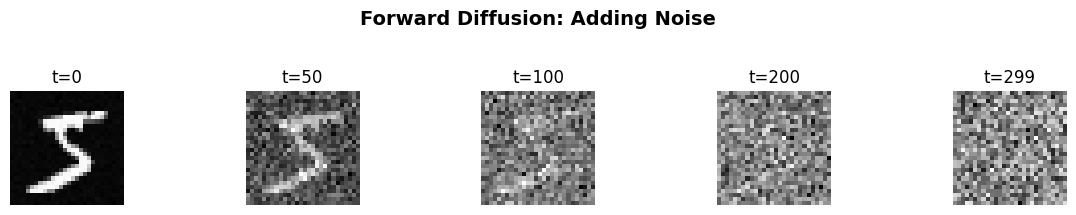

In [ ]:
# ✅ 순확산 시각화 (샘플 한 장)
x0 = x0_sample.unsqueeze(0).to(device)  # [1,1,28,28]
plt.figure(figsize=(12, 2))
for i, t in enumerate([0, 50, 100, 200, 299]):
    xt = add_noise(x0, torch.tensor([t], device=device))
    plt.subplot(1, 5, i + 1)
    plt.imshow(xt.squeeze().cpu(), cmap='gray')
    plt.axis('off')
    plt.title(f"t={t}")
plt.suptitle("Forward Diffusion: Adding Noise", y=1.05, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


**💡 노이즈가 잘 추가된 것을 확인할 수 있습니다!**

### 4-3. 역확산 (Reverse Diffusion)

In [ ]:
# ✅ 간단한 CNN 기반 denoiser
class SimpleDenoiser(nn.Module):
    def __init__(self):
        super().__init__()
        self.enc1 = nn.Conv2d(1, 32, 3, padding=1)
        self.enc2 = nn.Conv2d(32, 64, 3, stride=2, padding=1)
        self.dec1 = nn.ConvTranspose2d(64, 32, 4, stride=2, padding=1)
        self.out = nn.Conv2d(32, 1, 3, padding=1)
    def forward(self, x):
        h1 = F.relu(self.enc1(x))
        h2 = F.relu(self.enc2(h1))
        h3 = F.relu(self.dec1(h2))
        return torch.sigmoid(self.out(h3 + h1))  # skip connection

In [ ]:
model = SimpleDenoiser().to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
loss_fn = nn.MSELoss()


In [ ]:
# ✅ 노이즈 제거 학습 (batch 단위)
print("⏳ Training denoiser on multiple images...")
for epoch in range(10):  # 필요시 늘릴 수 있음 (10~20)
    for x_batch, _ in train_loader:
        x_batch = x_batch.to(device)
        t = torch.randint(0, T, (x_batch.size(0),), device=device)
        xt = add_noise(x_batch, t)
        pred = model(xt)
        loss = loss_fn(pred, x_batch)

        optimizer.zero_grad()
        loss.********()       #역전파
        optimizer.step()

    print(f"Epoch {epoch + 1}, loss = {loss.item():.4f}")


⏳ Training denoiser on multiple images...
Epoch 1, loss = 0.0464
Epoch 2, loss = 0.0405
Epoch 3, loss = 0.0426
Epoch 4, loss = 0.0479
Epoch 5, loss = 0.0342
Epoch 6, loss = 0.0429
Epoch 7, loss = 0.0429
Epoch 8, loss = 0.0357
Epoch 9, loss = 0.0371
Epoch 10, loss = 0.0417


In [ ]:
# ✅ 역확산 (점진적 노이즈 제거)
@torch.no_grad()
def reverse_diffusion(model, steps=10):
    x = torch.randn((1, 1, 28, 28), device=device)  # 완전 노이즈에서 시작
    images = [x.cpu()]
    for i in range(steps):
        denoised = model(x)
        x = x - 0.3 * (x - denoised)  # 단순 denoising step
        images.append(x.cpu())
    return images

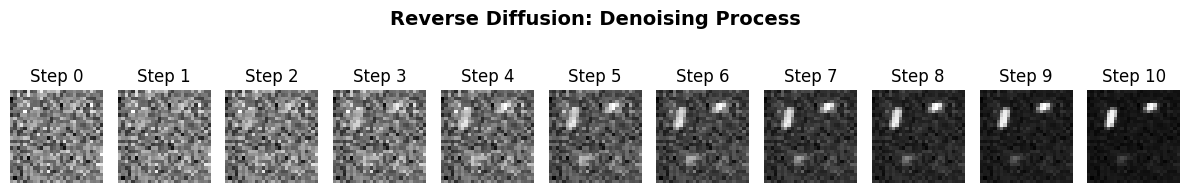

In [ ]:
# ✅ 역확산 시각화
images = reverse_*********(model, steps=10)     #위에서 정의한 역확산 함수!

plt.figure(figsize=(12, 2))
for i, img in enumerate(images):
    plt.subplot(1, len(images), i + 1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.axis('off')
    plt.title(f"Step {i}")
plt.suptitle("Reverse Diffusion: Denoising Process", y=1.05, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**💡 노이즈는 없어졌지만, 무슨 그림을 만들어낸 것인지는 모르겠죠?
epoch 수가 충분하지 않아서 학습 데이터가 부족했기 때문이에요.**

**과제에는 사전 학습된 Stable Diffusion을 통해 좋은 이미지를 얻어내보는 코드가 있으니 기대해주세요!**